# Assignment 4: Netflix Movies and TV

### Load the Datatset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

netflix = pd.read_csv('netflix_titles.csv')

In [ ]:
netflix.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5102,s5103,TV Show,Ratched,NaN,"Sarah Paulson, Finn Wittrock, Judy Davis, Shar...",United States,"September 18, 2020",2020,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries","In 1947, Mildred Ratched begins working as a n..."
5146,s5147,TV Show,Reign,NaN,"Adelaide Kane, Megan Follows, Torrance Coombs,...",United States,"September 5, 2017",2017,TV-14,4 Seasons,TV Dramas,This vivid historical drama series tells of th...
4982,s4983,Movie,Professor Mack,Christopher Nolen,"Lisa Wu, Timon Kyle Durrett, Robert Christophe...",United States,"August 6, 2019",2018,TV-MA,84 min,"Comedies, Romantic Movies",When a confident college professor is courted ...
7421,s7422,Movie,Vince and Kath and James,Theodore Boborol,"Julia Barretto, Joshua Garcia, Ronnie Alonte, ...",Philippines,"March 21, 2019",2016,TV-PG,115 min,"International Movies, Romantic Movies","Love can be complicated, especially when Vince..."
5783,s5784,Movie,Standoff,Adam Alleca,"Thomas Jane, Laurence Fishburne, Joanna Dougla...",Canada,"December 11, 2018",2015,R,86 min,Action & Adventure,"After witnessing an assassin's slaughter, a yo..."


### Preprocess some Data

In [ ]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
netflix.director.fillna("No Director", inplace=True)
netflix.cast.fillna("No Cast", inplace=True)
netflix.country.fillna("Country Unavailable", inplace=True)
netflix.dropna(subset=["date_added", "rating"], inplace=True)

In [ ]:
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
netflix.nunique()

show_id         7770
type               2
title           7770
director        4048
cast            6818
country          682
date_added      1563
release_year      73
rating            14
duration         216
listed_in        491
description     7752
dtype: int64

### Netflix Content By Type - number of movies and shows

Display the ration of movies to tv shows in the dataset

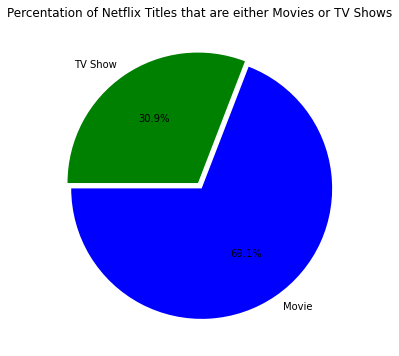

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Percentation of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(netflix.type.value_counts(),explode=(0.025,0.025), labels=netflix.type.value_counts().index, colors=['blue','green'],autopct='%1.1f%%', startangle=180)
plt.show()

### Kids Content

Kids TV shows and Movies on Netflix

In [ ]:
kids_movies = netflix['listed_in'].str.contains('Children & Family Movies', case=False, regex=False)
kids_tv = netflix['listed_in'].str.contains("Kids' TV", case=False, regex=False)

df_kids = netflix[kids_movies | kids_tv]
df_kids.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
108,s109,TV Show,3Below: Tales of Arcadia,No Director,"Tatiana Maslany, Diego Luna, Nick Offerman, Ni...",United States,"July 12, 2019",2019,TV-Y7,2 Seasons,"Kids' TV, TV Action & Adventure, TV Sci-Fi & F...","After crash-landing on Earth, two royal teen a..."
111,s112,TV Show,44 Cats,No Director,"Sarah Natochenny, Suzy Myers, Simona Berman, E...",Italy,"October 1, 2020",2018,TV-Y7,2 Seasons,Kids' TV,Paw-esome tales abound when singing furry frie...
113,s114,Movie,48 Christmas Wishes,"Marco Deufemia, Justin G. Dyck","Khiyla Aynne, Noah Dyer, Maya Franzoi, Clara K...",Canada,"December 20, 2017",2017,TV-G,84 min,"Children & Family Movies, Comedies",When a small town's letters to Santa accidenta...
145,s146,Movie,A 2nd Chance,Clay Glen,"Nina Pearce, Adam Tuominen, Emily Morris, Amy ...",Australia,"July 1, 2017",2011,PG,95 min,"Children & Family Movies, Dramas, Sports Movies",A gymnast lacks the confidence she needs to re...
147,s148,Movie,A Babysitter's Guide to Monster Hunting,Rachel Talalay,"Tamara Smart, Oona Laurence, Tom Felton, Troy ...",United States,"October 15, 2020",2020,TV-PG,99 min,Children & Family Movies,"Recruited by a secret society of babysitters, ..."


Movie      532
TV Show    411
Name: type, dtype: int64

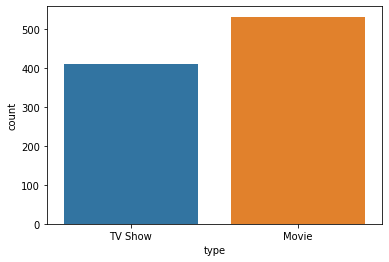

In [ ]:
plot = sns.countplot(x="type", data=df_kids)
df_kids["type"].value_counts()

### Stand-Up Comedy on Netflix

Show Stand-Up Comedy content on Netflix

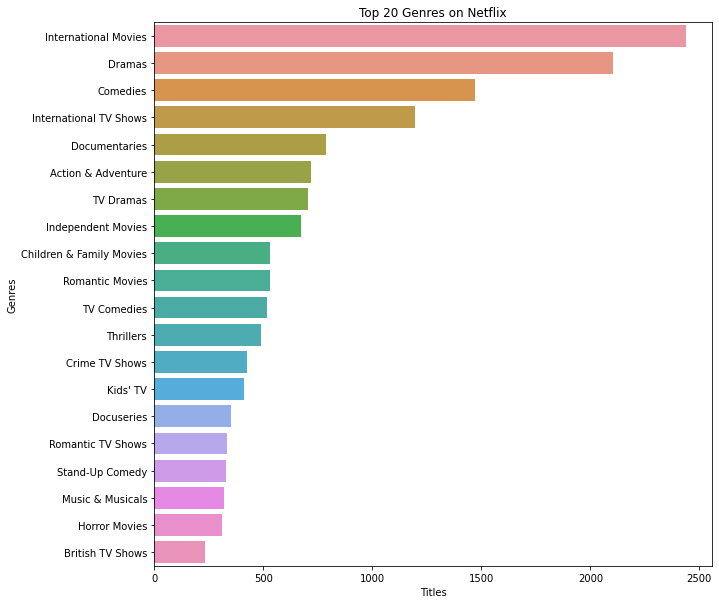

In [ ]:
filtered_genres = netflix.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

In [ ]:
standup = netflix['listed_in'].str.contains("Stand-Up Comedy", case=False, regex=False)

df_standup = netflix[standup]
df_standup.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
197,s198,TV Show,A Little Help with Carol Burnett,No Director,"Carol Burnett, Russell Peters, Mark Cuban, Tar...",United States,"May 4, 2018",2018,TV-G,1 Season,"Stand-Up Comedy & Talk Shows, TV Comedies",Comedy icon Carol Burnett returns to TV with a...
220,s221,Movie,A Russell Peters Christmas,Henry Sarwer-Foner,"Russell Peters, Pamela Anderson, Michael Bublé...",Canada,"November 1, 2013",2011,NR,44 min,Stand-Up Comedy,"Inspired by the variety shows of the 1970s, ""A..."
284,s285,TV Show,Abnormal Summit,"Jung-ah Im, Seung-uk Jo","Hyun-moo Jun, Si-kyung Sung, Se-yoon Yoo",South Korea,"August 4, 2017",2017,TV-PG,2 Seasons,"International TV Shows, Korean TV Shows, Stand...","Led by a trio of Korean celebs, a multinationa..."
305,s306,Movie,Adam Devine: Best Time of Our Lives,Jay Karas,Adam Devine,United States,"June 18, 2019",2019,TV-MA,59 min,Stand-Up Comedy,Frenetic comic Adam Devine talks teen awkwardn...
307,s308,Movie,ADAM SANDLER 100% FRESH,Steve Brill,Adam Sandler,United States,"October 23, 2018",2018,TV-MA,74 min,Stand-Up Comedy,"From ""Heroes"" to ""Ice Cream Ladies"" – Adam San..."


### Highest Rated Shows on Netflix

The amount of shows with different ratings

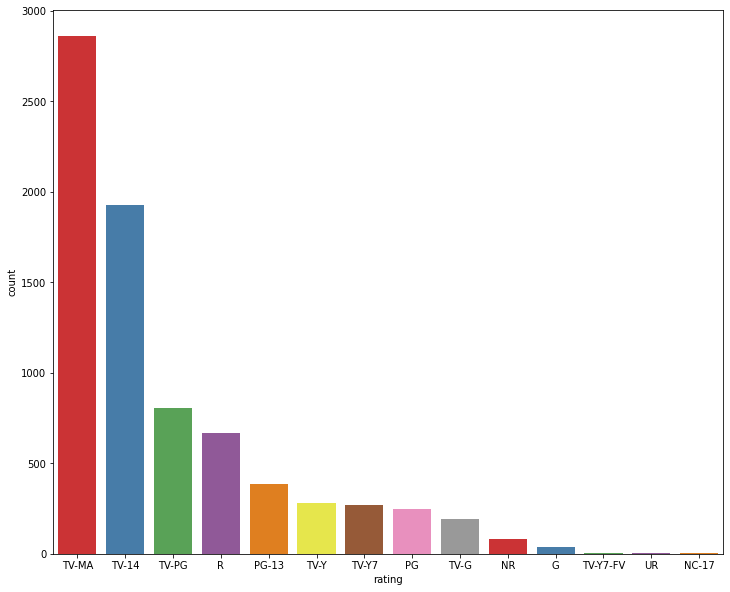

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(x="rating", data = netflix, palette = "Set1", order = netflix['rating'].value_counts().index[0:15])